# python extract pixel values using PIL

load photos sample data stored in a directory ./dataset_TEST/ as .jpeg
https://pillow.readthedocs.io/en/3.1.x/reference/Image.html 


In [13]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D

def get_imlist(path):
  """  Returns a list of all photo samples in directory. """

  return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpeg')]

def getRed(redVal):
    return '#%02x%02x%02x' % (redVal, 0, 0)
 
def getGreen(greenVal):
    return '#%02x%02x%02x' % (0, greenVal, 0)

def getBlue(blueVal):
    return '#%02x%02x%02x' % (0, 0, blueVal)

def get_histogram(image):
    """  histogram of the image in R,G,B """
    image.show()
    histogram = image.histogram()
    count_R = histogram[0:256]
    count_G = histogram[512:768]
    count_B = histogram[256:512]
    plt.figure(0)
    for i in range(0, 256):
        plt.bar(i, count_R[i], color = getRed(i), edgecolor=getRed(i), alpha=0.3)
        plt.xlabel("Red band")
        plt.ylabel("Pixel Count for Red band")
    plt.figure(1)
    for i in range(0, 256):
        plt.bar(i, count_G[i], color = getGreen(i), edgecolor=getGreen(i),alpha=0.3)
        plt.xlabel("Green band")
        plt.ylabel("Pixel Count for Green band")
    plt.figure(2)
    for i in range(0, 256):
        plt.bar(i, count_B[i], color = getBlue(i), edgecolor=getBlue(i),alpha=0.3)
        plt.xlabel("blue band")
        plt.ylabel("Pixel Count for blue band")
    plt.show()

def get_scatter(image):
    """  Returns a 3d scatter graph for image. """
    fig = plt.figure()
    ax = Axes3D(fig)
    
    R = list(im.getdata(0)) 
    G = list(im.getdata(1))
    B = list(im.getdata(2))
    
    ax.scatter(R, G, B, c='c', marker='o')
    ax.set_xlabel("Red")
    ax.set_ylabel("Green")
    ax.set_zlabel("Blue")
    plt.show()
    
def set_color_rang(image):
    
    return image


['./dataset_base/base_4.jpeg', './dataset_base/base_3.jpeg', './dataset_base/base_2.jpeg', './dataset_base/base.jpeg']


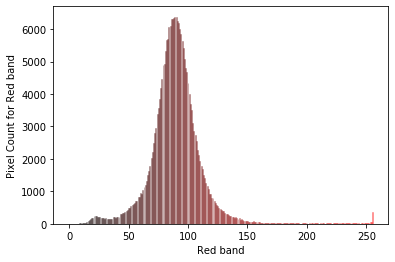

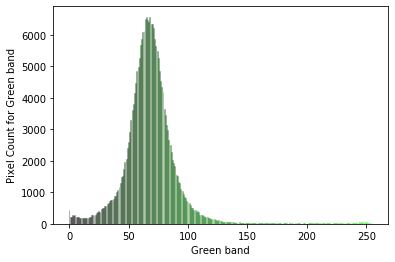

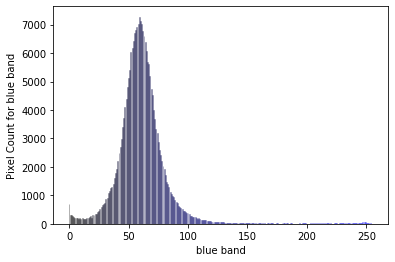

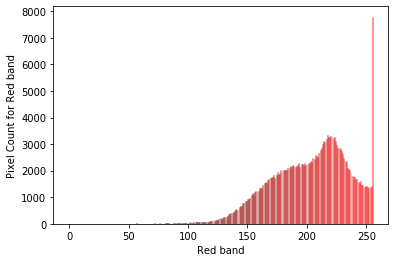

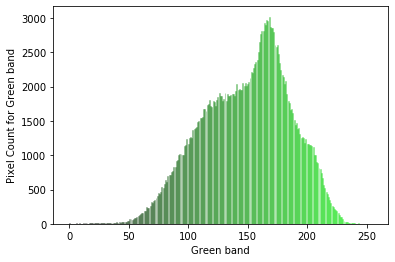

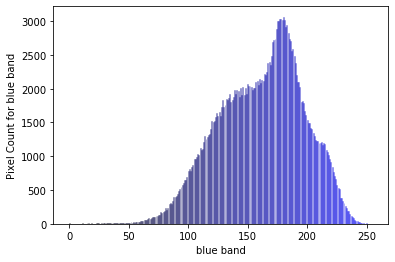

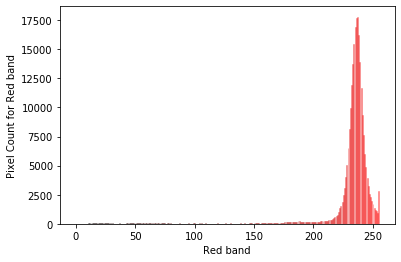

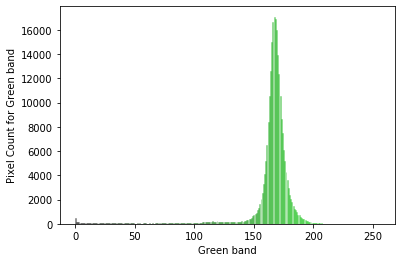

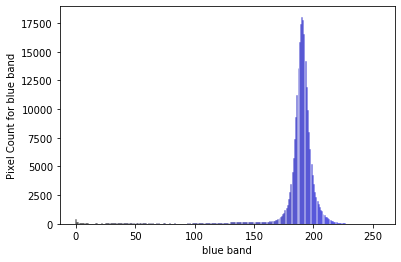

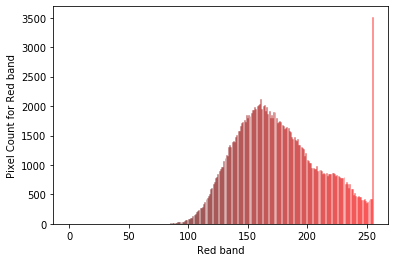

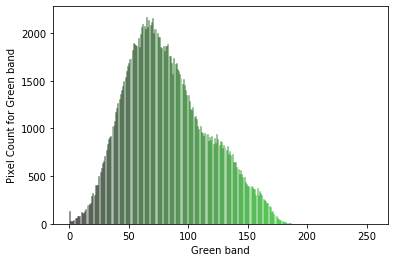

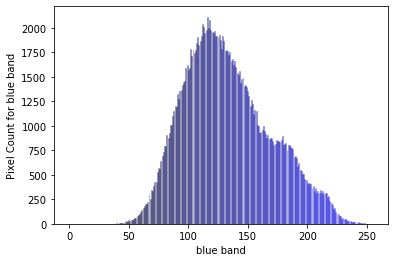

./dataset_TEST/IMG_2341.jpeg


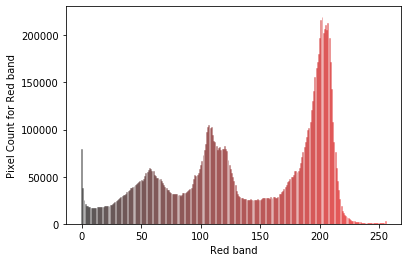

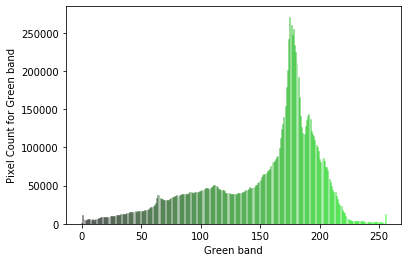

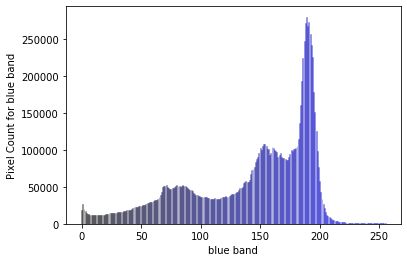

done


In [15]:
base = get_imlist('./dataset_base/')
print(base)
for i in base:
    base_i=Image.open(i)
    get_histogram(base_i)

imlist = get_imlist('./dataset_TEST/')

print (imlist[1])
im = Image.open(imlist[1]) 
get_histogram(im)
print ('done')
